In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
fichero = pd.read_csv("PANDAS/DATOS/attacks_sin_columnas.csv")

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
fichero.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [4]:
cantidad_sex = fichero["sex_"].value_counts()
cantidad_sex


M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [5]:
fichero[fichero["sex_"]=="lli"]

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
1617,2004.11.11.b,1624,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,13h30,5.5 m [18'] white shark,http://sharkattackfile.net/spreadsheets/pdf_di...


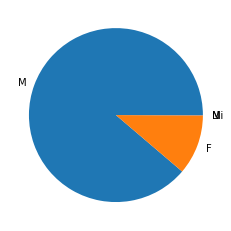

In [6]:
x = (4939, 619, 2, 2, 1, 1)
plt.figure()
plt.pie(x, labels =("M", "F", "M", "N", "Lli", ".") )
plt.show()

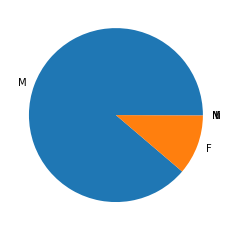

In [7]:
#Otra forma de sacar el mismo gráficos sería:
z = list(cantidad_sex.index)
y = list(np.array(cantidad_sex))
plt.figure()
plt.pie(y, labels = z )
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. 

In [8]:
fichero.isnull().sum()

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [9]:
nulo = pd.DataFrame(fichero.isnull().sum())
nulo

,0
case_number,1
unnamed:_0,0
year,0
type,4
country,40
area,408
location,488
activity,511
name,200
sex_,550


In [10]:
etiqueta = list(nulo.index)


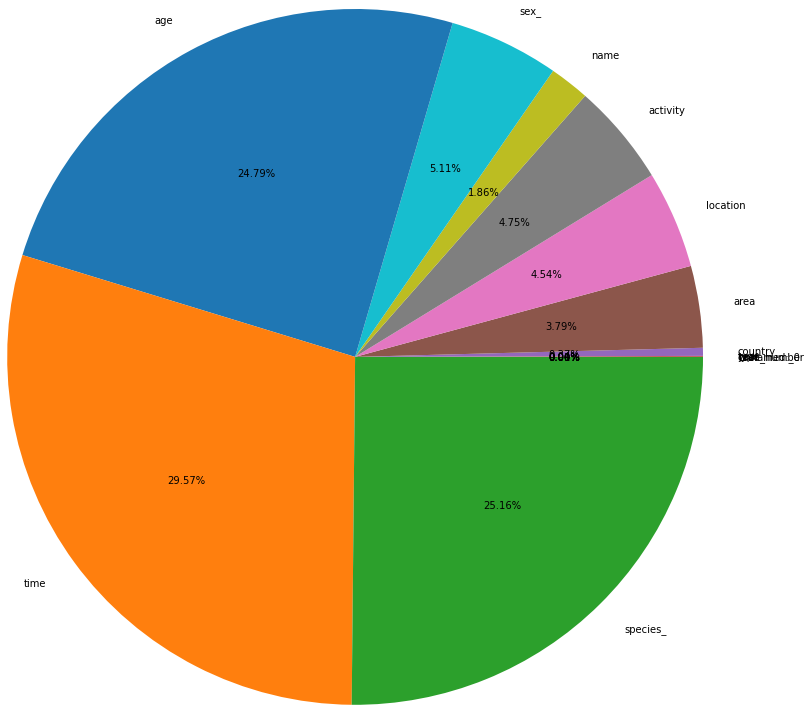

In [11]:
plt.figure()
plt.pie(nulo[0], labels = etiqueta, autopct="%1.2f%%", radius=4) 
plt.show()

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [12]:
fichero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6113 non-null   object 
 1   unnamed:_0   6114 non-null   int64  
 2   year         6114 non-null   float64
 3   type         6110 non-null   object 
 4   country      6074 non-null   object 
 5   area         5706 non-null   object 
 6   location     5626 non-null   object 
 7   activity     5603 non-null   object 
 8   name         5914 non-null   object 
 9   sex_         5564 non-null   object 
 10  age          3448 non-null   object 
 11  time         2934 non-null   object 
 12  species_     3409 non-null   object 
 13  href         6114 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 668.8+ KB


In [29]:

for i in fichero.columns:
    if fichero[i].unique() != int:
        #pd.DataFrame(fichero[i].unique())
        print(i,"----->", fichero[i].unique())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

4. Filtrad los datos para quedarnos solo con los datos de USA.

In [35]:
estado_usa = fichero[fichero["country"]=="USA"]
estado_usa.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [37]:
siglo_xxi = estado_usa[estado_usa["year"] >= 2000]
#siglo_xxi.info()

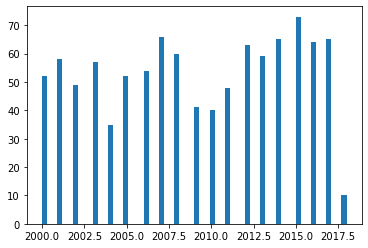

In [44]:
#Probamos el número de ataques por años a partir del 2000
plt.figure()

plt.hist(x= siglo_xxi["year"], bins=60)

plt.show()

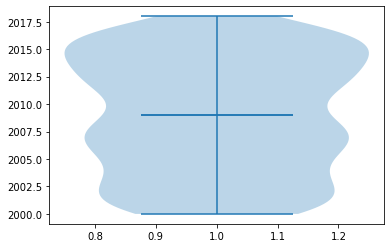

In [47]:
#
plt.figure()

plt.violinplot(siglo_xxi["year"], showmedians=True, showmeans=True)

plt.show()

In [57]:
"""plt.figure()
plt.plot(siglo_xxi["year"])
plt.show()"""

'plt.figure()\nplt.plot(siglo_xxi["year"])\nplt.show()'

- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [72]:
cantidad_especies = estado_usa["species_"].value_counts()
la = list(cantidad_especies.index)
le = list(np.array(cantidad_especies))


In [84]:
cantidad_especies

Shark involvement not confirmed                       53
White shark                                           43
4' shark                                              38
Invalid                                               31
Shark involvement prior to death was not confirmed    30
                                                      ..
Questionable Incident                                  1
Mako shark, 1.8 m [6']                                 1
2.4 m to 3.7 m [8' to 12'] shark                       1
9'2" white shark                                       1
Said to be a 7.6 m [25'] shark                         1
Name: species_, Length: 635, dtype: int64

In [80]:
estado_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 6110
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  2199 non-null   object 
 1   unnamed:_0   2200 non-null   int64  
 2   year         2200 non-null   float64
 3   type         2200 non-null   object 
 4   country      2200 non-null   object 
 5   area         2197 non-null   object 
 6   location     2151 non-null   object 
 7   activity     2069 non-null   object 
 8   name         2171 non-null   object 
 9   sex_         2103 non-null   object 
 10  age          1496 non-null   object 
 11  time         1379 non-null   object 
 12  species_     1313 non-null   object 
 13  href         2200 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 257.8+ KB


In [75]:
usa_copia = estado_usa.copy()

In [77]:
usa_copia = usa_copia["species_"].dropna()

In [82]:
usa_copia.unique()

array(['White shark', "Lemon shark, 3'", "Bull shark, 6'", "6' shark",
       "Tiger shark, 12'", 'Tiger shark', 'White shark, 4.6 m',
       'Spinner shark, 4 to 5 feet', 'Tiger shark, 8 to 10 feet',
       "8' shark", "5' shark", 'Questionable', "4' to 5' shark",
       "5' to 6' shark", 'Nurse shark', "White shark, 5' to 7'",
       'Possibly a juvenile blacktip shark', "4' shark",
       "White shark, 10'", 'A small shark', "Sandtiger shark  2'",
       '"A small shark"', 'Shark involvement not confirmed',
       "White shark, 11' to 13'", "White shark, 8' to 10'",
       "White shark, 9'", "Bull shark, 4' to 5'", 'No shark invovlement ',
       "3' shark", 'Shark involvement highly doubtful',
       'No shark invovlement - it ws a publicity stunt',
       "Bull shark, 5' to 7'", "White shark, female, 14'",
       " 6' to 8' shark", "3' to 4' shark", "Tiger shark, 10'",
       "Tiger shark, 10' ", 'Blacktip shark', "Nurse shark, 4'",
       "White shark, 10' to 12'", 'dogfish shark

/home/marina/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marina/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marina/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/marina/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


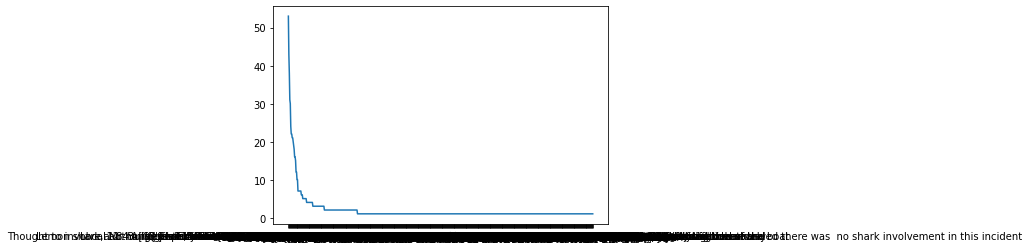

In [83]:
plt.figure()
plt.plot(la, le)
plt.show()

5. Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.